## Population

Term Population Is refered to large amount of data Set and sample is a subset of data from a larger data set.


## Types of Sampling


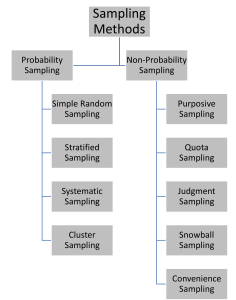

In [6]:
from IPython.display import Image
Image(filename="Images/Sampling.png")

### Probability Sampling (Equal chances)
- Random Sampling 

Random sampling is a process in which each available member of the population being sampled has an equal chance of being chosen for the sample at each draw. The sample that results is called a simple random sample.

Bias : Systematic error. 

Sample bias : A sample that misrepresents the population.

- Systematic Sampling

In this type of sampling, the first individual is selected randomly and others are selected using a fixed ‘sampling interval’.

- Stratified Sampling

In this type of sampling, we divide the population into subgroups (called strata) based on different traits like gender, category, etc. And then we select the sample(s) from these subgroups.

- Cluster Sampling

This type of sampling is used when we focus on a specific region or area.

In a clustered sample, we use the subgroups of the population as the sampling unit rather than individuals. The population is divided into subgroups, known as clusters, and a whole cluster is randomly selected.


### Non-Probability Sampling (No equal Chance)
- convenience Sampling

This is perhaps the easiest method of sampling because individuals are selected based on their availability and willingness to take part.

- Quota Sampling

In this type of sampling, we choose items based on predetermined characteristics of the population. Consider that we have to select individuals having a number in multiples of four

- Judgment Sampling

It is also known as selective sampling. It depends on the judgment of the experts when choosing whom to ask to participate.

- Snowball Sampling

In this type of sampling, Existing people are asked to nominate further people known to them so that the sample increases in size like a rolling snowball. This method of sampling is effective when a sampling frame is difficult to identify.

#### Selection Bias

biases where each member of the population is chosen selectively (consciously or unconsciously) - which leads to misleading conclusion.

#### Data snooping 

Extensive hunting through data in search of something interesting.

#### Vast search effect 

Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.


## Sampling Distribution

- Data distribution

The frequency distribution of individual values in a data set.

- Central limit theorem

The tendency of the sampling distribution to take on a normal shape as sample size rises.

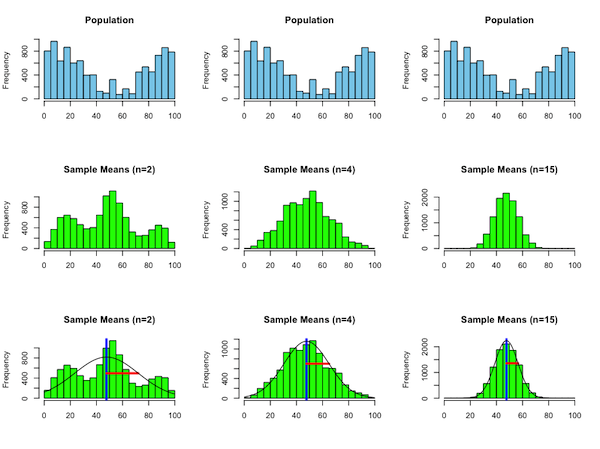

In [8]:
Image(filename="Images/CLT.png")

- Standard error 

The variability (standard deviation) of a sample statistic over many samples (not to be confused with standard deviation, which by itself, refers to variability of individual data values).

#### standard deviation (which measures the variability of individual data points) with standard error (which measures the variability of a sample metric).

## The Bootstrap

- Bootstrap Sampling is a method that involves drawing of sample data repeatedly with replacement from a data source to estimate a population parameter.

Resampling : The process of taking repeated samples from observed data; includes both boot‐ strap and permutation (shuffling) procedures.

Example

Student Height.



## Confidence Intervel vs Confidence Level 

Confidence levels are expressed as a percentage (for example, a 95% confidence level). It means that should you repeat an experiment or survey over and over again, 95 percent of the time your results will match the results you get from a population (in other words, your statistics would be sound!). Confidence intervals are your results and they are usually numbers. For example, you survey a group of pet owners to see how many cans of dog food they purchase a year. You test your statistic at the 99 percent confidence level and get a confidence interval of (200,300). That means you think they buy between 200 and 300 cans a year. You’re super confident (99% is a very high level!)

To find we mostly use T-test

## Types of Distribution

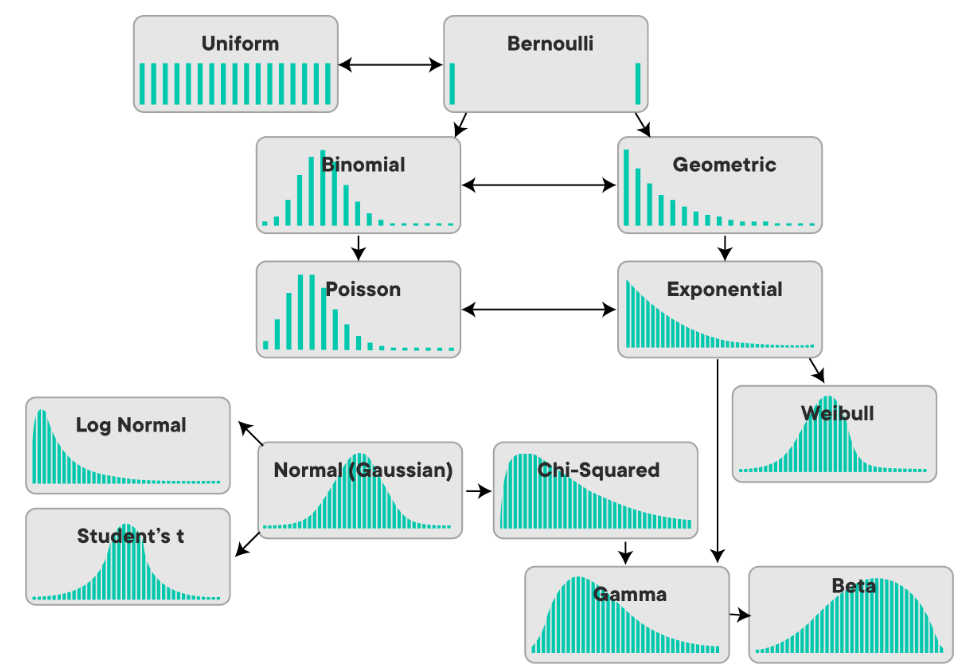

In [9]:
Image(filename="Images/Dis.png")

Key Terms for Normal Distribution

Error : The difference between a data point and a predicted or average value. 

Standardize : Subtract the mean and divide by the standard deviation.

z-score : The result of standardizing an individual data point. 

Standard normal : A normal distribution with mean = 0 and standard deviation = 1. 

QQ-Plot : A plot to visualize how close a sample distribution is to a specified distribution, e.g., the normal distribution.

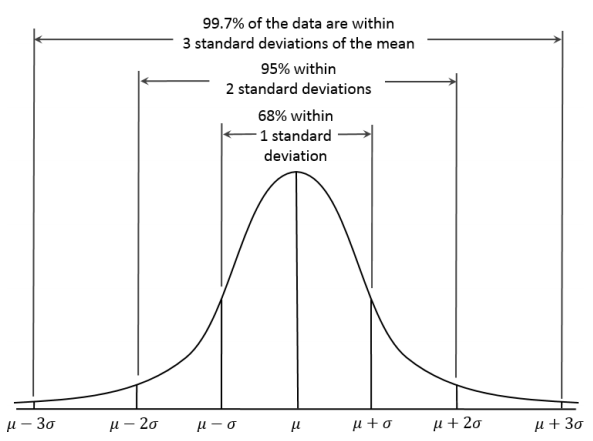

In [11]:
Image(filename="Images/gauss.png")

Q-Q Plot Reading  

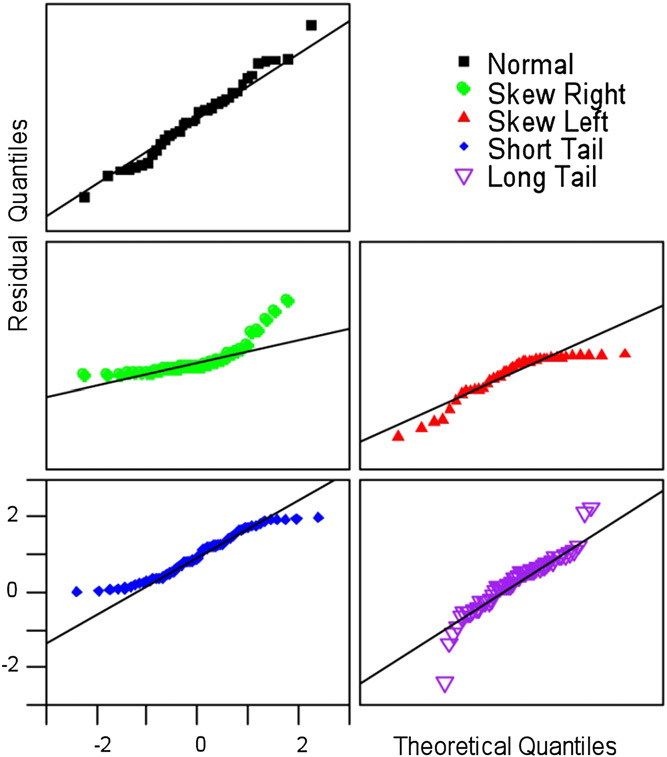

In [12]:
Image(filename="Images/QQplot.png")

## Variable or Feature Transformation

- Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
5. Logarithmic Transformation
6. Reciprocal Trnasformation
7. Square Root Transformation
8. Exponential Trnasformation
9. Box Cox Transformation

The most commonly used methods to transform variables are:

- Logarithmic transformation - np.log(X)
- Reciprocal transformation - 1 / X
- Square root transformation - X**(1/2)
- Exponential transformation (more general, you can use any exponent)
- Box-Cox transformation
- Yeo-Johnson transformation

In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [ ]:
### Logarithmic transformation
df['Feature_name'] = np.log(df['Feature_name'])
diagnostic_plots(df, 'Feature_name')

In [ ]:
### Reciprocal transformation
df['name'] = 1 / (df['name']) 
# np.reciprocal(data['name'])
diagnostic_plots(df, 'name')

In [ ]:
### Square root transformation
df['name'] = df['name']**(1/2) 
#np.sqrt(data['name'])
diagnostic_plots(df, 'name')

In [ ]:
### Exponential
df['name'] = df['name']**(1/1.5) # you can vary the exponent as needed
# np.power(data['name'], any exponent we want)
diagnostic_plots(df, 'name')

### Box-Cox transformation

The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ if λ!=0, or log(Y) otherwise. 

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

Briefly, for each  λ (the transformation tests several λs), the correlation coefficient of the Probability Plot (Q-Q plot below, correlation between ordered values and theoretical quantiles) is calculated (this optimisation equation actually varies with the implementation). 

The value of λ corresponding to the maximum correlation on the plot is then the optimal choice for λ.

In python, we can evaluate and obtain the best λ with the stats.boxcox function from the package scipy.

Let's have a look.

In [ ]:
df['name'], param = stats.boxcox(df['name']) 
print('Optimal λ: ', param)
diagnostic_plots(df, 'name')

### Yeo-Johnson

Yeo-Johnson is the same as Box-Cox for the positive values of the variable, but it has different equations for the negative values of the variable as described [here](https://www.stat.umn.edu/arc/yjpower.pdf)

Again, the function searches over a bunch of λ and selects the one that returns the best fit to a normal distribution. 

In [ ]:
# to avoid a NumPy error
df['name'] = df['name'].astype('float')
df['name'], param = stats.yeojohnson(df['name']) 
print('Optimal λ: ', param)
diagnostic_plots(df, 'name')